In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = "SimHei" #解决中文乱码问题
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

# 缺失值查看预处理

In [2]:
df_train = pd.read_csv(r'../data/data_format1/train_format1.csv')
df_test = pd.read_csv(r'../data/data_format1/test_format1.csv')
user_info = pd.read_csv(r'../data/data_format1/user_info_format1.csv')

In [3]:
user_log = pd.read_csv(r'../data/data_format1/user_log_format1.csv')

In [4]:
print(df_test.shape,df_train.shape)
print(user_info.shape,user_log.shape)

(261477, 3) (260864, 3)
(424170, 3) (54925330, 7)


In [5]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [6]:
user_info.head(10)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0
5,272389,6.0,1.0
6,281071,4.0,0.0
7,139859,7.0,0.0
8,198411,5.0,1.0
9,67037,4.0,1.0


In [7]:
user_info['age_range'].replace(0.0,np.nan,inplace=True)
user_info['gender'].replace(2.0,np.nan,inplace=True)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  329039 non-null  float64
 2   gender     407308 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [8]:
user_info['age_range'].replace(np.nan,-1,inplace=True)
user_info['gender'].replace(np.nan,-1,inplace=True)

Text(0.5, 1.0, '用户年龄分布')

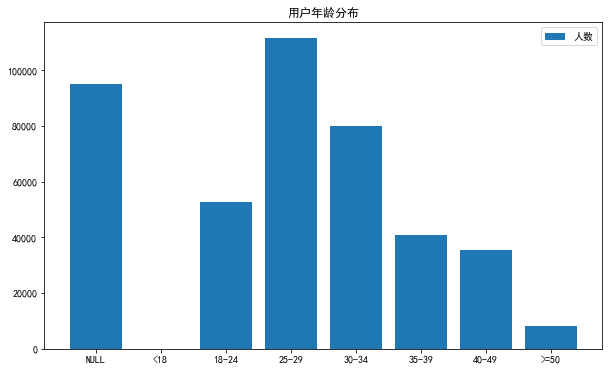

In [9]:
fig = plt.figure(figsize = (10, 6))
x = np.array(["NULL","<18","18-24","25-29","30-34","35-39","40-49",">=50"])
#<18岁为1；[18,24]为2； [25,29]为3； [30,34]为4；[35,39]为5；[40,49]为6； > = 50时为7和8
y = np.array([user_info[user_info['age_range'] == -1]['age_range'].count(),
             user_info[user_info['age_range'] == 1]['age_range'].count(),
             user_info[user_info['age_range'] == 2]['age_range'].count(),
             user_info[user_info['age_range'] == 3]['age_range'].count(),
             user_info[user_info['age_range'] == 4]['age_range'].count(),
             user_info[user_info['age_range'] == 5]['age_range'].count(),
             user_info[user_info['age_range'] == 6]['age_range'].count(),
             user_info[user_info['age_range'] == 7]['age_range'].count() + user_info[user_info['age_range'] == 8]['age_range'].count()])
plt.bar(x,y,label='人数')
plt.legend()
plt.title('用户年龄分布')

Text(0.5, 1.0, '用户年龄分布')

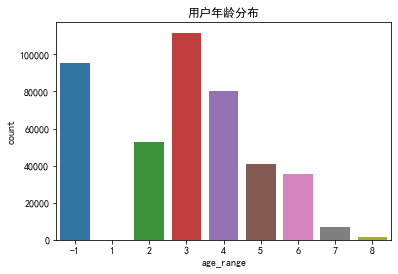

In [10]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8], data = user_info)
plt.title('用户年龄分布')

Text(0.5, 1.0, '用户性别分布')

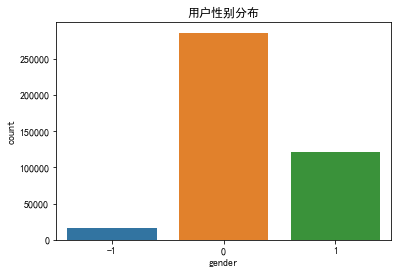

In [11]:
sns.countplot(x='gender',order = [-1,0,1],data = user_info)
plt.title('用户性别分布')

Text(0.5, 1.0, '用户性别年龄分布')

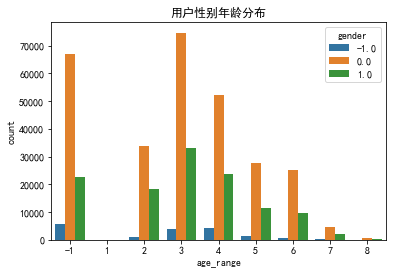

In [12]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8],hue= 'gender',data = user_info)
plt.title('用户性别年龄分布')

+ 年纪的缺省值不少，性别的缺省值倒是不多。
+ 用户年纪主要分布在18-34岁，且主要为女性。
+ 缺失值处理的话，先简单处理一下，把缺失值都做删除处理吧，后面继续尝试的话可以试试填充缺失值
+ 后来又注释掉了，没有删，因为这里是原始数据，应该在建立好特征之后再删吧

In [13]:
user_info['age_range'].replace(-1,np.nan,inplace=True)
user_info['gender'].replace(-1,np.nan,inplace=True)

In [14]:
#user_info = user_info.dropna()
#user_info.info()

Text(0.5, 1.0, '用户性别年龄分布')

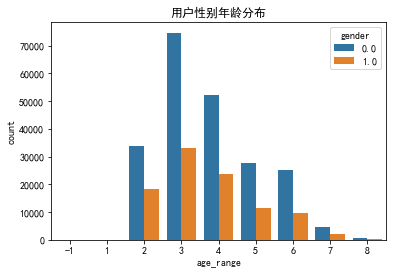

In [15]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8],hue= 'gender',data = user_info)
plt.title('用户性别年龄分布')

In [16]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [17]:
#user_log = user_log.dropna()
user_log.isnull().sum(axis=0)

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [18]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


+ 这里对于用户日志里的商品品牌的缺失也做了删除处理，反正也不多是不是
+ 没删，没删

# 初步可视化

+ user_log前面几行全是编码，购物者的唯一ID编码，商品的唯一编码，商品所属品类的唯一编码，商家的唯一ID编码，商品品牌的唯一编码
+ 后面是购买时间，与活动日志记录

In [19]:
df_train.head(10)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0
5,362112,2618,0
6,34944,2051,0
7,231552,3828,1
8,231552,2124,0
9,232320,1168,0


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


<AxesSubplot:>

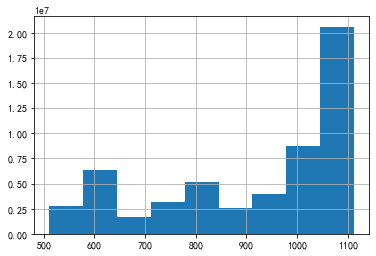

In [21]:
user_log['time_stamp'].hist(bins = 9)

+ 618和双十一购买的东西最多

<AxesSubplot:xlabel='action_type', ylabel='count'>

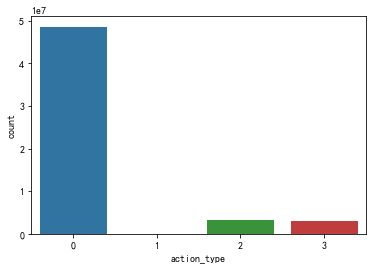

In [22]:
sns.countplot(x = 'action_type', order = [0,1,2,3],data = user_log)

+ 绝大多数都是单击，加入购物车的动作很少，比购买和收藏的动作还要少

# 特征工程

In [23]:
df_train[df_train['label'] == 1]

,user_id,merchant_id,label
2,34176,4356,1
7,231552,3828,1
53,306816,1489,1
57,176256,3323,1
59,307584,1340,1
...,...,...,...
260747,208511,2592,1
260793,87935,1964,1
260794,87935,3734,1
260799,350591,4394,1


In [24]:
user_log[(user_log['user_id'] == 34176) & (user_log['seller_id'] == 3906)].sort_values(by=['item_id','time_stamp'])

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
35906008,34176,48054,302,3906,6268.0,1027,0
35906020,34176,157439,662,3906,6268.0,1027,0
35905834,34176,185202,821,3906,6268.0,1027,0
35905996,34176,187402,1577,3906,6268.0,1027,0
35906027,34176,198962,1577,3906,6268.0,1027,0
35906023,34176,246109,821,3906,6268.0,1027,0
35906011,34176,320263,662,3906,6268.0,1027,0
35906012,34176,468438,821,3906,6268.0,1027,0
35906021,34176,475546,1397,3906,6268.0,1027,0
35906026,34176,523545,662,3906,6268.0,1027,0


<AxesSubplot:>

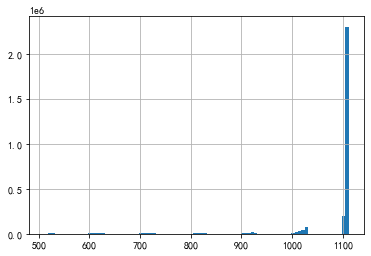

In [69]:
df_test_all = pd.merge(df_test,user_log,left_on=["user_id","merchant_id"],right_on=["user_id","seller_id"],how="left")

df_test_all['time_stamp'].hist(bins = 90)

In [66]:
res=df_train_all[df_train_all["action_type"]==2].groupby(["item_id"]).sum().rename(columns={'action_type':'item_sell_num'})\
.reset_index().sort_values(by=['item_sell_num'])[['label','item_sell_num']]
#[['brand_id','brand_sell_num']]
res.to_csv(path_or_buf = r"research_item_id.csv",index = False)


## 想要建立的特征
需要根据user_id，和merchant_id（seller_id）,从用户画像表以及用户日志表中提取特征，填写到df_train这个数据框中，从而训练评估模型
需要建立的特征如下：
+ 用户的年龄(age_range)
+ 用户的性别(gender)
+ 某用户在该商家日志的总条数(total_logs)
+ 用户浏览的商品的数目，就是浏览了多少个商品(unique_item_ids)
+ 浏览的商品的种类的数目，就是浏览了多少种商品(categories)
+ 用户浏览的天数(browse_days)
+ 用户单击的次数(one_clicks)
+ 用户添加购物车的次数(shopping_carts)
+ 用户购买的次数(purchase_times)
+ 用户收藏的次数(favourite_times)

In [26]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [27]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [28]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


### age_range,gender特征添加

In [29]:
df_train = pd.merge(df_train,user_info,on="user_id",how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,NaN,0.0


### total_logs特征添加

In [30]:
total_logs_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]

In [31]:
total_logs_temp.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1
5,1,2245,5
6,1,4026,5
7,1,4177,1
8,1,4335,1
9,2,420,26


In [32]:
total_logs_temp.rename(columns={"seller_id":"merchant_id","item_id":"total_logs"},inplace=True)
total_logs_temp.head()

,user_id,merchant_id,total_logs
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1


In [33]:
df_train = pd.merge(df_train,total_logs_temp,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs
0,34176,3906,0,6.0,0.0,39
1,34176,121,0,6.0,0.0,14
2,34176,4356,1,6.0,0.0,18
3,34176,2217,0,6.0,0.0,2
4,230784,4818,0,NaN,0.0,8


### unique_item_ids特征添加

In [34]:
unique_item_ids_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["item_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]

In [35]:
unique_item_ids_temp.head(10)

,user_id,seller_id,item_id
0,1,471,638653
1,1,739,556107
2,1,925,504149
3,1,1019,1110495
4,1,1156,896183
5,1,2245,181459
6,1,2245,452837
7,1,2245,543397
8,1,2245,779078
9,1,4026,112203


In [36]:
unique_item_ids_temp1 = unique_item_ids_temp.groupby([unique_item_ids_temp["user_id"],unique_item_ids_temp["seller_id"]]).count().reset_index()

In [37]:
unique_item_ids_temp1.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [38]:
unique_item_ids_temp1.rename(columns={"seller_id":"merchant_id","item_id":"unique_item_ids"},inplace=True)

In [39]:
unique_item_ids_temp1.head(10)

,user_id,merchant_id,unique_item_ids
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [40]:
df_train = pd.merge(df_train,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids
0,34176,3906,0,6.0,0.0,39,20
1,34176,121,0,6.0,0.0,14,1
2,34176,4356,1,6.0,0.0,18,2
3,34176,2217,0,6.0,0.0,2,1
4,230784,4818,0,NaN,0.0,8,1


### categories特征构建

In [41]:
categories_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["cat_id"]]).count().reset_index()[["user_id","seller_id","cat_id"]]

In [42]:
categories_temp.head(20)

,user_id,seller_id,cat_id
0,1,471,389
1,1,739,1252
2,1,925,1023
3,1,1019,992
4,1,1156,1256
5,1,2245,276
6,1,4026,1252
7,1,4177,1252
8,1,4335,389
9,2,420,602


In [43]:
categories_temp1 = categories_temp.groupby([categories_temp["user_id"],categories_temp["seller_id"]]).count().reset_index()
categories_temp1.head(10)

,user_id,seller_id,cat_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [44]:
categories_temp1.rename(columns={"seller_id":"merchant_id","cat_id":"categories"},inplace=True)
categories_temp1.head(10)

,user_id,merchant_id,categories
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [45]:
df_train = pd.merge(df_train,categories_temp1,on=["user_id","merchant_id"],how="left")

In [46]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories
0,34176,3906,0,6.0,0.0,39,20,6
1,34176,121,0,6.0,0.0,14,1,1
2,34176,4356,1,6.0,0.0,18,2,1
3,34176,2217,0,6.0,0.0,2,1,1
4,230784,4818,0,NaN,0.0,8,1,1
5,362112,2618,0,4.0,1.0,1,1,1
6,34944,2051,0,5.0,0.0,3,2,1
7,231552,3828,1,5.0,0.0,83,48,15
8,231552,2124,0,5.0,0.0,7,4,1
9,232320,1168,0,4.0,1.0,4,1,1


### browse_days特征构建

In [47]:
browse_days_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["time_stamp"]]).count().reset_index()[["user_id","seller_id","time_stamp"]]

In [48]:
browse_days_temp.head(10)

,user_id,seller_id,time_stamp
0,1,471,1111
1,1,739,1018
2,1,925,1011
3,1,1019,1111
4,1,1156,1111
5,1,2245,1009
6,1,4026,1018
7,1,4026,1021
8,1,4177,1018
9,1,4335,1111


In [49]:
browse_days_temp1 = browse_days_temp.groupby([browse_days_temp["user_id"],browse_days_temp["seller_id"]]).count().reset_index()
browse_days_temp1.head(10)

,user_id,seller_id,time_stamp
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [50]:
browse_days_temp1.rename(columns={"seller_id":"merchant_id","time_stamp":"browse_days"},inplace=True)
browse_days_temp1.head(10)

,user_id,merchant_id,browse_days
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [51]:
df_train = pd.merge(df_train,browse_days_temp1,on=["user_id","merchant_id"],how="left")

In [52]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days
0,34176,3906,0,6.0,0.0,39,20,6,9
1,34176,121,0,6.0,0.0,14,1,1,3
2,34176,4356,1,6.0,0.0,18,2,1,2
3,34176,2217,0,6.0,0.0,2,1,1,1
4,230784,4818,0,NaN,0.0,8,1,1,3
5,362112,2618,0,4.0,1.0,1,1,1,1
6,34944,2051,0,5.0,0.0,3,2,1,1
7,231552,3828,1,5.0,0.0,83,48,15,3
8,231552,2124,0,5.0,0.0,7,4,1,1
9,232320,1168,0,4.0,1.0,4,1,1,2


### one_clicks、shopping_carts、purchase_times、favourite_times特征构建

In [53]:
one_clicks_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["action_type"]]).count().reset_index()[["user_id","seller_id","action_type","item_id"]]

In [54]:
one_clicks_temp.head(10)

,user_id,seller_id,action_type,item_id
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [55]:
one_clicks_temp.rename(columns={"seller_id":"merchant_id","item_id":"times"},inplace=True)

In [56]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [57]:
one_clicks_temp["one_clicks"] = one_clicks_temp["action_type"] == 0
one_clicks_temp.head(10)


,user_id,merchant_id,action_type,times,one_clicks
0,1,471,0,1,True
1,1,739,0,1,True
2,1,925,0,3,True
3,1,925,2,1,False
4,1,1019,0,10,True
5,1,1019,2,4,False
6,1,1156,0,1,True
7,1,2245,0,5,True
8,1,4026,0,4,True
9,1,4026,2,1,False


In [58]:
one_clicks_temp["one_clicks"] = one_clicks_temp["one_clicks"] * one_clicks_temp["times"]

In [59]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks
0,1,471,0,1,1
1,1,739,0,1,1
2,1,925,0,3,3
3,1,925,2,1,0
4,1,1019,0,10,10
5,1,1019,2,4,0
6,1,1156,0,1,1
7,1,2245,0,5,5
8,1,4026,0,4,4
9,1,4026,2,1,0


In [60]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["action_type"] == 1

In [61]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["shopping_carts"] * one_clicks_temp["times"]

In [62]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts
0,1,471,0,1,1,0
1,1,739,0,1,1,0
2,1,925,0,3,3,0
3,1,925,2,1,0,0
4,1,1019,0,10,10,0
5,1,1019,2,4,0,0
6,1,1156,0,1,1,0
7,1,2245,0,5,5,0
8,1,4026,0,4,4,0
9,1,4026,2,1,0,0


In [63]:
one_clicks_temp["purchase_times"] = one_clicks_temp["action_type"] == 2

In [64]:
one_clicks_temp["purchase_times"] = one_clicks_temp["purchase_times"] * one_clicks_temp["times"]

In [65]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times
0,1,471,0,1,1,0,0
1,1,739,0,1,1,0,0
2,1,925,0,3,3,0,0
3,1,925,2,1,0,0,1
4,1,1019,0,10,10,0,0
5,1,1019,2,4,0,0,4
6,1,1156,0,1,1,0,0
7,1,2245,0,5,5,0,0
8,1,4026,0,4,4,0,0
9,1,4026,2,1,0,0,1


In [66]:
one_clicks_temp["favourite_times"] = one_clicks_temp["action_type"] == 3

In [67]:
one_clicks_temp["favourite_times"] = one_clicks_temp["favourite_times"] * one_clicks_temp["times"]

In [68]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0
5,1,1019,2,4,0,0,4,0
6,1,1156,0,1,1,0,0,0
7,1,2245,0,5,5,0,0,0
8,1,4026,0,4,4,0,0,0
9,1,4026,2,1,0,0,1,0


In [69]:
four_features = one_clicks_temp.groupby([one_clicks_temp["user_id"],one_clicks_temp["merchant_id"]]).sum().reset_index()

In [70]:
four_features.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,2,4,3,0,1,0
3,1,1019,2,14,10,0,4,0
4,1,1156,0,1,1,0,0,0
5,1,2245,0,5,5,0,0,0
6,1,4026,2,5,4,0,1,0
7,1,4177,0,1,1,0,0,0
8,1,4335,0,1,1,0,0,0
9,2,420,2,26,23,0,3,0


In [71]:
four_features = four_features.drop(["action_type","times"], axis=1)

In [72]:
df_train = pd.merge(df_train,four_features,on=["user_id","merchant_id"],how="left")

In [73]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,34176,3906,0,6.0,0.0,39,20,6,9,36,0,1,2
1,34176,121,0,6.0,0.0,14,1,1,3,13,0,1,0
2,34176,4356,1,6.0,0.0,18,2,1,2,12,0,6,0
3,34176,2217,0,6.0,0.0,2,1,1,1,1,0,1,0
4,230784,4818,0,NaN,0.0,8,1,1,3,7,0,1,0
5,362112,2618,0,4.0,1.0,1,1,1,1,0,0,1,0
6,34944,2051,0,5.0,0.0,3,2,1,1,2,0,1,0
7,231552,3828,1,5.0,0.0,83,48,15,3,78,0,5,0
8,231552,2124,0,5.0,0.0,7,4,1,1,6,0,1,0
9,232320,1168,0,4.0,1.0,4,1,1,2,2,0,1,1


In [77]:
# 商家特征处理
groups = user_log.groupby(['seller_id'])
# 商家被交互行为数量 m1
temp = groups.size().reset_index().rename(columns={0:'m_actions'})
df_train = df_train.merge(temp, left_on='merchant_id',right_on='seller_id', how='left')
# 统计商家被交互的user_id, item_id, cat_id, brand_id 唯一值
temp = groups['user_id', 'item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={'user_id':'m_user_num', 'item_id':'m_item_num', 'cat_id':'m_cat_num', 'brand_id':'m_brand_num'})
df_train = df_train.merge(temp,  left_on='merchant_id',right_on='seller_id', how='left')
# 统计商家被交互的action_type 唯一值
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'m_click_num', 1:'m_cart_num', 2:'m_sell_num', 3:'m_favorite_num'})
df_train = df_train.merge(temp, left_on='merchant_id',right_on='seller_id', how='left')

print(df_train)

<ipython-input-77-196967fb950d>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = groups['user_id', 'item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={'user_id':'m_user_num', 'item_id':'m_item_num', 'cat_id':'m_cat_num', 'brand_id':'m_brand_num'})


        user_id  merchant_id  label  age_range  gender  total_logs  \
0         34176         3906      0        6.0     0.0          39   
1         34176          121      0        6.0     0.0          14   
2         34176         4356      1        6.0     0.0          18   
3         34176         2217      0        6.0     0.0           2   
4        230784         4818      0        NaN     0.0           8   
...         ...          ...    ...        ...     ...         ...   
260859   359807         4325      0        4.0     1.0          20   
260860   294527         3971      0        NaN     1.0          17   
260861   294527          152      0        NaN     1.0           9   
260862   294527         2537      0        NaN     1.0           1   
260863   229247         4140      0        4.0     NaN          24   

        unique_item_ids  categories  browse_days  one_clicks  ...  \
0                    20           6            9          36  ...   
1                    

## 建立好的特征的缺失值处理

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260864 entries, 0 to 260863
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        203802 non-null  float64
 4   gender           250170 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
 13  seller_id_x      260864 non-null  int64  
 14  m_actions        260864 non-null  int64  
 15  seller_id_y      260864 non-null  int64  
 16  m_user_num       260864 non-null  int6

In [79]:
df_train.isnull().sum(axis=0)

user_id                0
merchant_id            0
label                  0
age_range          57062
gender             10694
total_logs             0
unique_item_ids        0
categories             0
browse_days            0
one_clicks             0
shopping_carts         0
purchase_times         0
favourite_times        0
seller_id_x            0
m_actions              0
seller_id_y            0
m_user_num             0
m_item_num             0
m_cat_num              0
m_brand_num            0
seller_id              0
m_click_num            0
m_cart_num          2061
m_sell_num             0
m_favorite_num         0
dtype: int64

In [80]:
df_train = df_train.fillna(method='ffill')
# 缺失值向前填充

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260864 entries, 0 to 260863
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        260864 non-null  float64
 4   gender           260864 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
 13  seller_id_x      260864 non-null  int64  
 14  m_actions        260864 non-null  int64  
 15  seller_id_y      260864 non-null  int64  
 16  m_user_num       260864 non-null  int6

## 特征可视化

Text(0.5, 1.0, '训练集用户性别年龄分布')

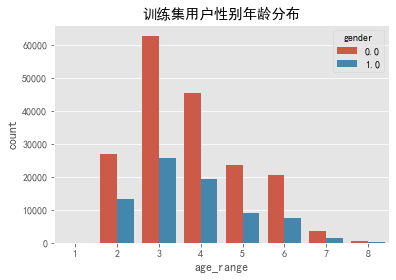

In [82]:
plt.style.use('ggplot')
sns.countplot(x = 'age_range', order = [1,2,3,4,5,6,7,8],hue= 'gender',data = df_train)
plt.title('训练集用户性别年龄分布')

['user_id', 'merchant_id', 'label', 'age_range', 'gender', 'total_logs', 'unique_item_ids', 'categories', 'browse_days', 'one_clicks', 'shopping_carts', 'purchase_times', 'favourite_times', 'seller_id_x', 'm_actions', 'seller_id_y', 'm_user_num', 'm_item_num', 'm_cat_num', 'm_brand_num', 'seller_id', 'm_click_num', 'm_cart_num', 'm_sell_num', 'm_favorite_num']


Text(0, 0.5, '用户数')

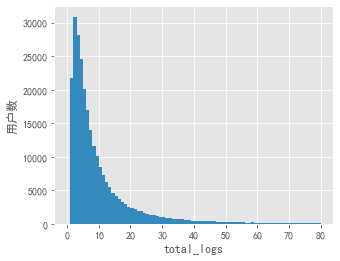

In [83]:
colnm = df_train.columns.tolist()
print(colnm)
plt.figure(figsize = (5, 4))
color = sns.color_palette()

df_train[colnm[5]].hist(range=[0,80],bins = 80,color = color[1])
plt.xlabel(colnm[5],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

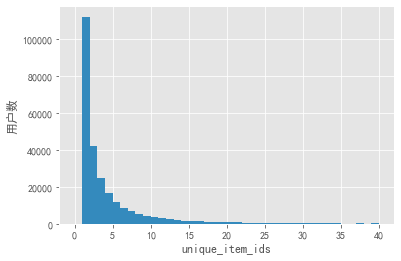

In [84]:
df_train[colnm[6]].hist(range=[0,40],bins = 40,color = color[1])
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

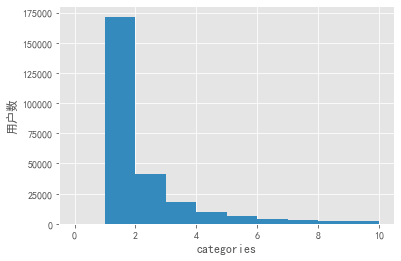

In [85]:
df_train[colnm[7]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[7],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

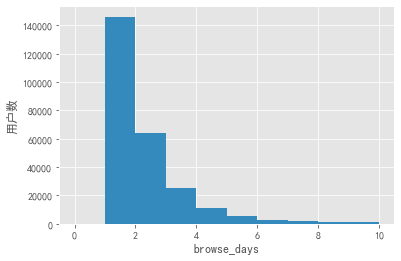

In [86]:
df_train[colnm[8]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[8],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户单击次数统计')

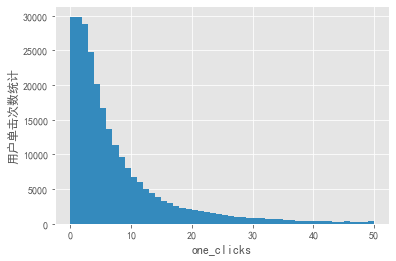

In [87]:
df_train[colnm[9]].hist(range=[0,50],bins = 50,color = color[1])
plt.xlabel(colnm[9],fontsize = 12)
plt.ylabel('用户单击次数统计')

Text(0, 0.5, '用户数')

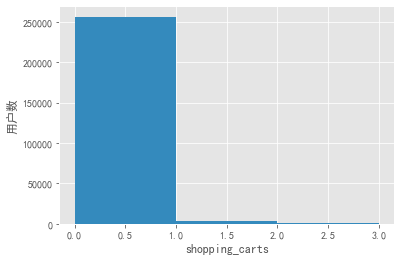

In [88]:
df_train[colnm[10]].hist(range=[0,3],bins = 3,color = color[1])
plt.xlabel(colnm[10],fontsize = 12)
plt.ylabel('用户数')

Text(0, 0.5, '用户数')

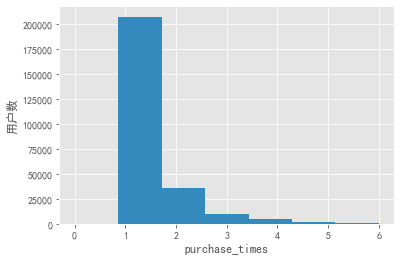

In [89]:
df_train[colnm[11]].hist(range=[0,6],bins = 7,color = color[1])
plt.xlabel(colnm[11],fontsize = 12)
plt.ylabel("用户数")

Text(0, 0.5, '用户数')

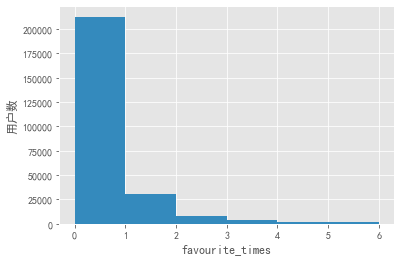

In [90]:
df_train[colnm[12]].hist(range=[0,6],bins = 6,color = color[1])
plt.xlabel(colnm[12],fontsize = 12)
plt.ylabel("用户数")

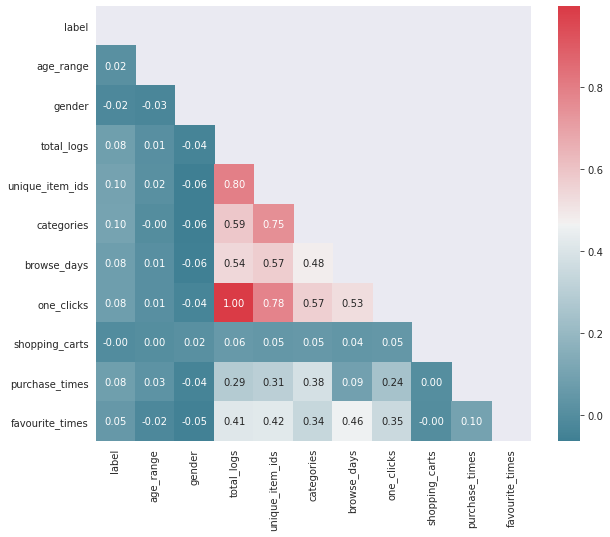

In [91]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df_train.columns.tolist()[2:13]
mcorr = df_train[colnm].corr()
# np.zero_like的意思就是生成一个和你所给数组a相同shape的全0数组。
mask = np.zeros_like(mcorr, dtype=np.bool)
# np.triu_indices_from()返回方阵的上三角矩阵的索引
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True,fmt='0.2f')
# 相关性好像不大，可是日志里确实也没啥可以用的其他特征了啊

# 模型构建与调参

### 逻辑斯特模型

In [92]:
Y = df_train['label']
X = df_train.drop(['user_id','merchant_id','label'],axis = 1)
X.head(10)

,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,...,seller_id_y,m_user_num,m_item_num,m_cat_num,m_brand_num,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num
0,6.0,0.0,39,20,6,9,36,0,1,2,...,3906,5819,308,20,1,3906,14870.0,28.0,410.0,961.0
1,6.0,0.0,14,1,1,3,13,0,1,0,...,121,10931,1179,26,1,121,72265.0,121.0,4780.0,2699.0
2,6.0,0.0,18,2,1,2,12,0,6,0,...,4356,2281,67,15,1,4356,6094.0,16.0,963.0,196.0
3,6.0,0.0,2,1,1,1,1,0,1,0,...,2217,16870,377,5,1,2217,52230.0,101.0,3721.0,4150.0
4,6.0,0.0,8,1,1,3,7,0,1,0,...,4818,7500,461,27,1,4818,43268.0,129.0,2733.0,1959.0
5,4.0,1.0,1,1,1,1,0,0,1,0,...,2618,1399,90,7,3,2618,3270.0,5.0,502.0,238.0
6,5.0,0.0,3,2,1,1,2,0,1,0,...,2051,6678,189,3,4,2051,17525.0,34.0,2317.0,1280.0
7,5.0,0.0,83,48,15,3,78,0,5,0,...,3828,76871,4691,53,2,3828,667956.0,900.0,18877.0,42722.0
8,5.0,0.0,7,4,1,1,6,0,1,0,...,2124,10274,837,6,2,2124,58926.0,53.0,1821.0,3474.0
9,4.0,1.0,4,1,1,2,2,0,1,1,...,1168,3468,521,29,2,1168,11654.0,14.0,933.0,497.0


In [93]:
Y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25,random_state = 10)

In [95]:
Logit = LogisticRegression(solver='liblinear')
Logit.fit(X_train, y_train)
Predict = Logit.predict(X_test)
Predict_proba = Logit.predict_proba(X_test)
print(Predict[0:20])
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
Score
# 一般的准确率验证方法

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.98068776 0.01931224]
 [0.94870228 0.05129772]
 [0.95145932 0.04854068]
 ...
 [0.81408382 0.18591618]
 [0.94948485 0.05051515]
 [0.97050006 0.02949994]]


0.9379753434739941

In [96]:
print("lr.coef_: {}".format(Logit.coef_))
print("lr.intercept_: {}".format(Logit.intercept_))
# 截距与斜率

lr.coef_: [[-2.24234899e-01 -2.59586359e-02 -2.33289389e-02  4.74869789e-02
  -1.54989451e-02 -5.54954886e-02  1.42058457e-02 -1.89136063e-03
  -4.64379144e-02  1.07944904e-02 -1.35512325e-04  7.50089529e-03
  -1.35512325e-04 -1.56755470e-04 -4.12880600e-04 -7.96187614e-03
   1.35214643e-02 -1.35512325e-04 -7.48569769e-03 -5.01168424e-03
  -7.46598747e-03 -7.48827295e-03]]
lr.intercept_: [-0.06746867]


In [97]:
#初始化逻辑回归算法
LogRegAlg=LogisticRegression(random_state=1,solver='liblinear')
re = LogRegAlg.fit(X,Y)
#使用sklearn库里面的交叉验证函数获取预测准确率分数
scores = model_selection.cross_val_score(LogRegAlg,X,Y,cv=3)
#使用交叉验证分数的平均值作为最终的准确率
print("准确率为: ",scores.mean())

准确率为:  0.938500521019355


### K近邻模型

In [98]:
# 模型实例化，并将邻居个数设为3 
reg = KNeighborsRegressor(n_neighbors=1000)
# 利用训练数据和训练目标值来拟合模型 
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.01


“这一算法对于有很多特 征（几百或更多）的数据集往往效果不好，对于大多数特征的大多数取值都为 0 的数据集 （所谓的稀疏数据集）来说，这一算法的效果尤其不好”我的数据里面零很多，果然预测效果很不好，和闹着玩似的

### 决策树

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0) 
tree.fit(X_train, y_train)
Predict_proba = tree.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

[[0.89280371 0.10719629]
 [0.96116063 0.03883937]
 [0.94880712 0.05119288]
 ...
 [0.92860167 0.07139833]
 [0.96116063 0.03883937]
 [0.94880712 0.05119288]]
Accuracy on training set: 0.939
Accuracy on test set: 0.938


In [100]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0","1"], feature_names=X.columns.tolist(), impurity=False, filled=True)
# 我们可以利用 tree 模块的 export_graphviz 函数来将树可视化。这个函数会生成一 个 .dot 格式的文件，这是一种用于保存图形的文本文件格式。
# 设置为结点添加颜色 的选项，颜色表示每个结点中的多数类别，同时传入类别名称和特征名称，这样可以对 树正确标记

In [101]:
import graphviz
with open("tree.dot") as f: 
    dot_graph = f.read() 
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [102]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.176662   0.4631402  0.02440587
 0.         0.         0.18366251 0.         0.         0.
 0.         0.         0.         0.09069459 0.0209904  0.
 0.         0.         0.03416847 0.00627596]


<BarContainer object of 22 artists>

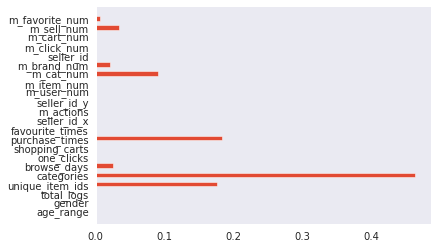

In [103]:
plt.barh(X.columns.tolist(),height=0.5,width=tree.feature_importances_,align="center")

### 随机森林

In [104]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=2) 
forest.fit(X_train, y_train)
Predict_proba = forest.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

[[0.9   0.1  ]
 [1.    0.   ]
 [1.    0.   ]
 ...
 [0.8   0.2  ]
 [0.475 0.525]
 [1.    0.   ]]
Accuracy on training set: 0.979
Accuracy on test set: 0.931


<BarContainer object of 22 artists>

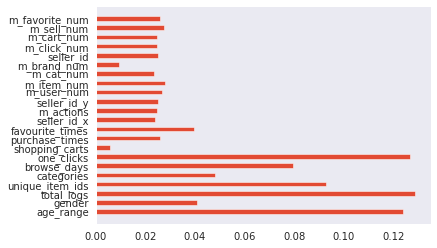

In [105]:
plt.barh(X.columns.tolist(),height=0.5,width=forest.feature_importances_,align="center")

### 梯度提升回归树

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train)
Predict_proba = gbrt.predict_proba(X_test)
print(Predict_proba[:])
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

[[0.86712651 0.13287349]
 [0.96746112 0.03253888]
 [0.96258427 0.03741573]
 ...
 [0.92071819 0.07928181]
 [0.96772779 0.03227221]
 [0.92625692 0.07374308]]
Accuracy on training set: 0.939
Accuracy on test set: 0.938


<BarContainer object of 22 artists>

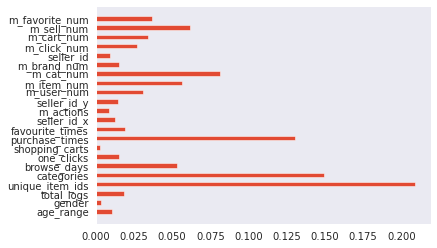

In [107]:
plt.barh(X.columns.tolist(),height=0.5,width=gbrt.feature_importances_,align="center")

### 多层感知机

In [103]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=0.1,random_state=0,hidden_layer_sizes=[10,10]).fit(X_train, y_train)
Predict = mlp.predict(X_test)
Predict_proba = mlp.predict_proba(X_test)
print(Predict_proba[:])
Score = accuracy_score(y_test, Predict)
print(Score)

[[0.81269884 0.18730116]
 [0.95229477 0.04770523]
 [0.94939548 0.05060452]
 ...
 [0.93389924 0.06610076]
 [0.95658191 0.04341809]
 [0.89973404 0.10026596]]
0.938297350343474


/root/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


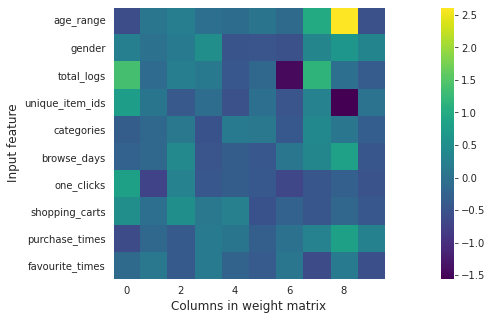

In [104]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(10), X.columns.tolist()) 
plt.xlabel("Columns in weight matrix") 
plt.ylabel("Input feature") 
plt.colorbar()
# 显示了连接输入和第一个隐层之间的权重。图中的行对应 10个输入特征，列对应 10个隐单元。

In [105]:
# 原始数据预处理之缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [106]:
X_train = X_train[X_train.columns.tolist()].astype(float)
X_test = X_test[X_test.columns.tolist()].astype(float)

In [107]:
scaler.fit(X_train)

StandardScaler()

In [108]:
# 变换数据
X_train_scaled = scaler.transform(X_train)

In [109]:
X_test_scaled = scaler.transform(X_test)

In [110]:
mlp1 = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10]).fit(X_train_scaled, y_train)
Predict = mlp1.predict(X_test)
Score = accuracy_score(y_test, Predict)
print(Score)

0.9381286800785084


缩放之后的结果也没啥大不了的

# 实践预测

In [111]:
df_test.head()

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


## 特征构建

In [108]:
df_test = pd.merge(df_test,user_info,on="user_id",how="left")

In [109]:
df_test = pd.merge(df_test,total_logs_temp,on=["user_id","merchant_id"],how="left")

In [110]:
df_test = pd.merge(df_test,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")

In [111]:
df_test = pd.merge(df_test,categories_temp1,on=["user_id","merchant_id"],how="left")

In [112]:
df_test = pd.merge(df_test,browse_days_temp1,on=["user_id","merchant_id"],how="left")

In [113]:
df_test = pd.merge(df_test,four_features,on=["user_id","merchant_id"],how="left")

In [114]:
# 商家特征处理
groups = user_log.groupby(['seller_id'])
# 商家被交互行为数量 m1
temp = groups.size().reset_index().rename(columns={0:'m_actions'})
df_test = df_test.merge(temp, left_on='merchant_id',right_on='seller_id', how='left')
# 统计商家被交互的user_id, item_id, cat_id, brand_id 唯一值
temp = groups['user_id', 'item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={'user_id':'m_user_num', 'item_id':'m_item_num', 'cat_id':'m_cat_num', 'brand_id':'m_brand_num'})
df_test = df_test.merge(temp,  left_on='merchant_id',right_on='seller_id', how='left')
# 统计商家被交互的action_type 唯一值
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'m_click_num', 1:'m_cart_num', 2:'m_sell_num', 3:'m_favorite_num'})
df_test = df_test.merge(temp, left_on='merchant_id',right_on='seller_id', how='left')

<ipython-input-114-d2e9db51f279>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = groups['user_id', 'item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={'user_id':'m_user_num', 'item_id':'m_item_num', 'cat_id':'m_cat_num', 'brand_id':'m_brand_num'})


In [115]:
df_test = df_test.fillna(method='bfill')
df_test = df_test.fillna(method='ffill')
# 缺失值向后填充

In [116]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,seller_id_y,m_user_num,m_item_num,m_cat_num,m_brand_num,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,4605,15605,223,31,1,4605,46546.0,62.0,6896.0,3439.0
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,1581,836,57,8,1,1581,4027.0,4.0,904.0,212.0
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,1964,4876,113,22,1,1964,14354.0,28.0,2177.0,771.0
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,3645,8766,440,21,1,3645,24419.0,31.0,1107.0,1365.0
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,3361,2176,89,13,2,3361,7213.0,11.0,233.0,217.0
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,98,2158,152,17,2,98,6527.0,5.0,914.0,579.0
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,1742,11228,1179,5,1,1742,42690.0,89.0,2717.0,2483.0
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,598,15830,731,12,2,598,82733.0,206.0,4727.0,4229.0
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,1963,8600,504,28,1,1963,57321.0,54.0,1497.0,1553.0
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,2634,625,524,16,1,2634,5513.0,12.0,303.0,118.0


In [117]:
df_test.isnull().sum(axis=0)

user_id                 0
merchant_id             0
prob               261477
age_range               0
gender                  0
total_logs              0
unique_item_ids         0
categories              0
browse_days             0
one_clicks              0
shopping_carts          0
purchase_times          0
favourite_times         0
seller_id_x             0
m_actions               0
seller_id_y             0
m_user_num              0
m_item_num              0
m_cat_num               0
m_brand_num             0
seller_id               0
m_click_num             0
m_cart_num              0
m_sell_num              0
m_favorite_num          0
dtype: int64

## 模型预测

In [118]:
X1 = df_test.drop(['user_id','merchant_id','prob'],axis = 1)

In [119]:
X1.head(10)

,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,shopping_carts,purchase_times,favourite_times,...,seller_id_y,m_user_num,m_item_num,m_cat_num,m_brand_num,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num
0,2.0,0.0,2,1,1,1,1,0,1,0,...,4605,15605,223,31,1,4605,46546.0,62.0,6896.0,3439.0
1,2.0,0.0,10,9,4,1,5,0,5,0,...,1581,836,57,8,1,1581,4027.0,4.0,904.0,212.0
2,6.0,0.0,6,1,1,1,5,0,1,0,...,1964,4876,113,22,1,1964,14354.0,28.0,2177.0,771.0
3,6.0,0.0,11,1,1,1,10,0,1,0,...,3645,8766,440,21,1,3645,24419.0,31.0,1107.0,1365.0
4,2.0,1.0,50,8,4,5,47,0,1,2,...,3361,2176,89,13,2,3361,7213.0,11.0,233.0,217.0
5,2.0,0.0,11,2,1,4,9,0,1,1,...,98,2158,152,17,2,98,6527.0,5.0,914.0,579.0
6,5.0,1.0,13,6,1,1,11,0,2,0,...,1742,11228,1179,5,1,1742,42690.0,89.0,2717.0,2483.0
7,3.0,1.0,2,1,1,1,1,0,1,0,...,598,15830,731,12,2,598,82733.0,206.0,4727.0,4229.0
8,3.0,1.0,3,2,1,1,2,0,1,0,...,1963,8600,504,28,1,1963,57321.0,54.0,1497.0,1553.0
9,3.0,1.0,7,4,3,1,6,0,1,0,...,2634,625,524,16,1,2634,5513.0,12.0,303.0,118.0


### 逻辑回归模型

In [120]:
Predict_proba = Logit.predict_proba(X1)

In [121]:
df_test["Logit_prob"] = Predict_proba[:,1]

In [122]:
Predict_proba[0:10]

array([[0.9839541 , 0.0160459 ],
       [0.79291665, 0.20708335],
       [0.95022903, 0.04977097],
       [0.98640716, 0.01359284],
       [0.93690261, 0.06309739],
       [0.7722721 , 0.2277279 ],
       [0.96177766, 0.03822234],
       [0.8781347 , 0.1218653 ],
       [0.91022451, 0.08977549],
       [0.89807067, 0.10192933]])

In [123]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,m_user_num,m_item_num,m_cat_num,m_brand_num,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num,Logit_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,15605,223,31,1,4605,46546.0,62.0,6896.0,3439.0,0.016046
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,836,57,8,1,1581,4027.0,4.0,904.0,212.0,0.207083
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,4876,113,22,1,1964,14354.0,28.0,2177.0,771.0,0.049771
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,8766,440,21,1,3645,24419.0,31.0,1107.0,1365.0,0.013593
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,2176,89,13,2,3361,7213.0,11.0,233.0,217.0,0.063097
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,2158,152,17,2,98,6527.0,5.0,914.0,579.0,0.227728
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,11228,1179,5,1,1742,42690.0,89.0,2717.0,2483.0,0.038222
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,15830,731,12,2,598,82733.0,206.0,4727.0,4229.0,0.121865
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,8600,504,28,1,1963,57321.0,54.0,1497.0,1553.0,0.089775
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,625,524,16,1,2634,5513.0,12.0,303.0,118.0,0.101929


### 决策树

In [124]:
Predict_proba = tree.predict_proba(X1)

In [125]:
df_test["Tree_prob"] = Predict_proba[:,1]

In [126]:
Predict_proba[0:10]

array([[0.94880712, 0.05119288],
       [0.89280371, 0.10719629],
       [0.94880712, 0.05119288],
       [0.96116063, 0.03883937],
       [0.93145807, 0.06854193],
       [0.96116063, 0.03883937],
       [0.90928935, 0.09071065],
       [0.94880712, 0.05119288],
       [0.96116063, 0.03883937],
       [0.93145807, 0.06854193]])

In [127]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,m_item_num,m_cat_num,m_brand_num,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num,Logit_prob,Tree_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,223,31,1,4605,46546.0,62.0,6896.0,3439.0,0.016046,0.051193
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,57,8,1,1581,4027.0,4.0,904.0,212.0,0.207083,0.107196
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,113,22,1,1964,14354.0,28.0,2177.0,771.0,0.049771,0.051193
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,440,21,1,3645,24419.0,31.0,1107.0,1365.0,0.013593,0.038839
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,89,13,2,3361,7213.0,11.0,233.0,217.0,0.063097,0.068542
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,152,17,2,98,6527.0,5.0,914.0,579.0,0.227728,0.038839
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,1179,5,1,1742,42690.0,89.0,2717.0,2483.0,0.038222,0.090711
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,731,12,2,598,82733.0,206.0,4727.0,4229.0,0.121865,0.051193
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,504,28,1,1963,57321.0,54.0,1497.0,1553.0,0.089775,0.038839
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,524,16,1,2634,5513.0,12.0,303.0,118.0,0.101929,0.068542


### 随机森林

In [128]:
Predict_proba = forest.predict_proba(X1)

In [129]:
df_test["Forest_prob"] = Predict_proba[:,1]

In [130]:
Predict_proba[0:10]

array([[1.        , 0.        ],
       [0.9       , 0.1       ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91655109, 0.08344891],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [131]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,m_cat_num,m_brand_num,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num,Logit_prob,Tree_prob,Forest_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,31,1,4605,46546.0,62.0,6896.0,3439.0,0.016046,0.051193,0.000000
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,8,1,1581,4027.0,4.0,904.0,212.0,0.207083,0.107196,0.100000
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,22,1,1964,14354.0,28.0,2177.0,771.0,0.049771,0.051193,0.100000
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,21,1,3645,24419.0,31.0,1107.0,1365.0,0.013593,0.038839,0.000000
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,13,2,3361,7213.0,11.0,233.0,217.0,0.063097,0.068542,0.100000
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,17,2,98,6527.0,5.0,914.0,579.0,0.227728,0.038839,0.000000
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,5,1,1742,42690.0,89.0,2717.0,2483.0,0.038222,0.090711,0.000000
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,12,2,598,82733.0,206.0,4727.0,4229.0,0.121865,0.051193,0.083449
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,28,1,1963,57321.0,54.0,1497.0,1553.0,0.089775,0.038839,0.000000
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,16,1,2634,5513.0,12.0,303.0,118.0,0.101929,0.068542,0.000000


### 梯度提升回归树

In [132]:
Predict_proba = gbrt.predict_proba(X1)

In [133]:
df_test["Gbrt_prob"] = Predict_proba[:,1]

In [134]:
Predict_proba[0:10]

array([[0.9629652 , 0.0370348 ],
       [0.8476924 , 0.1523076 ],
       [0.94535069, 0.05464931],
       [0.96617441, 0.03382559],
       [0.94068685, 0.05931315],
       [0.95804153, 0.04195847],
       [0.92809934, 0.07190066],
       [0.95653257, 0.04346743],
       [0.96767015, 0.03232985],
       [0.93145307, 0.06854693]])

In [135]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,m_brand_num,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num,Logit_prob,Tree_prob,Forest_prob,Gbrt_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,1,4605,46546.0,62.0,6896.0,3439.0,0.016046,0.051193,0.000000,0.037035
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,1,1581,4027.0,4.0,904.0,212.0,0.207083,0.107196,0.100000,0.152308
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,1,1964,14354.0,28.0,2177.0,771.0,0.049771,0.051193,0.100000,0.054649
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,1,3645,24419.0,31.0,1107.0,1365.0,0.013593,0.038839,0.000000,0.033826
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,2,3361,7213.0,11.0,233.0,217.0,0.063097,0.068542,0.100000,0.059313
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,2,98,6527.0,5.0,914.0,579.0,0.227728,0.038839,0.000000,0.041958
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,1,1742,42690.0,89.0,2717.0,2483.0,0.038222,0.090711,0.000000,0.071901
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,2,598,82733.0,206.0,4727.0,4229.0,0.121865,0.051193,0.083449,0.043467
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,1,1963,57321.0,54.0,1497.0,1553.0,0.089775,0.038839,0.000000,0.032330
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,1,2634,5513.0,12.0,303.0,118.0,0.101929,0.068542,0.000000,0.068547


### 多层感知机

In [136]:
Predict_proba = mlp.predict_proba(X1)

NameError: name 'mlp' is not defined

In [137]:
df_test["mlp_prob"] = Predict_proba[:,1]

In [138]:
Predict_proba[0:10]

array([[0.9629652 , 0.0370348 ],
       [0.8476924 , 0.1523076 ],
       [0.94535069, 0.05464931],
       [0.96617441, 0.03382559],
       [0.94068685, 0.05931315],
       [0.95804153, 0.04195847],
       [0.92809934, 0.07190066],
       [0.95653257, 0.04346743],
       [0.96767015, 0.03232985],
       [0.93145307, 0.06854693]])

In [139]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,seller_id,m_click_num,m_cart_num,m_sell_num,m_favorite_num,Logit_prob,Tree_prob,Forest_prob,Gbrt_prob,mlp_prob
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,4605,46546.0,62.0,6896.0,3439.0,0.016046,0.051193,0.000000,0.037035,0.037035
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,1581,4027.0,4.0,904.0,212.0,0.207083,0.107196,0.100000,0.152308,0.152308
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,1964,14354.0,28.0,2177.0,771.0,0.049771,0.051193,0.100000,0.054649,0.054649
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,3645,24419.0,31.0,1107.0,1365.0,0.013593,0.038839,0.000000,0.033826,0.033826
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,3361,7213.0,11.0,233.0,217.0,0.063097,0.068542,0.100000,0.059313,0.059313
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,98,6527.0,5.0,914.0,579.0,0.227728,0.038839,0.000000,0.041958,0.041958
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,1742,42690.0,89.0,2717.0,2483.0,0.038222,0.090711,0.000000,0.071901,0.071901
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,598,82733.0,206.0,4727.0,4229.0,0.121865,0.051193,0.083449,0.043467,0.043467
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,1963,57321.0,54.0,1497.0,1553.0,0.089775,0.038839,0.000000,0.032330,0.032330
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,2634,5513.0,12.0,303.0,118.0,0.101929,0.068542,0.000000,0.068547,0.068547


### XGboost模型

In [140]:
#模型XGboost
# setup regressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV #网格搜索


#xgb_model = xgb.XGBClassifier() 
xgb_model_tmp = xgb.XGBClassifier() 

# performance a grid search
xgb_model = GridSearchCV(
    xgb_model_tmp,   
    {
        'max_depth':[5,10],
        'n_estimators':[50,150],
        'learning_rate':[0.1,0.2]
    },   
    cv = 3,   
    verbose = 1,
    n_jobs = -1,  
    scoring = 'neg_mean_squared_error') 
xgb_model.fit(X_train, y_train)
print('Best: %f using %s'%(xgb_model.best_score_, xgb_model.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  1.6min remaining:   59.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.2min finished
/root/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:14:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.061043 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [141]:
Predict_proba = xgb_model.predict_proba(X1)

In [142]:
df_test["xgb_model"] = Predict_proba[:,1]

In [143]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,m_click_num,m_cart_num,m_sell_num,m_favorite_num,Logit_prob,Tree_prob,Forest_prob,Gbrt_prob,mlp_prob,xgb_model
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,46546.0,62.0,6896.0,3439.0,0.016046,0.051193,0.000000,0.037035,0.037035,0.043112
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,4027.0,4.0,904.0,212.0,0.207083,0.107196,0.100000,0.152308,0.152308,0.111324
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,14354.0,28.0,2177.0,771.0,0.049771,0.051193,0.100000,0.054649,0.054649,0.046627
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,24419.0,31.0,1107.0,1365.0,0.013593,0.038839,0.000000,0.033826,0.033826,0.038432
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,7213.0,11.0,233.0,217.0,0.063097,0.068542,0.100000,0.059313,0.059313,0.072833
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,6527.0,5.0,914.0,579.0,0.227728,0.038839,0.000000,0.041958,0.041958,0.045597
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,42690.0,89.0,2717.0,2483.0,0.038222,0.090711,0.000000,0.071901,0.071901,0.076883
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,82733.0,206.0,4727.0,4229.0,0.121865,0.051193,0.083449,0.043467,0.043467,0.048427
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,57321.0,54.0,1497.0,1553.0,0.089775,0.038839,0.000000,0.032330,0.032330,0.034159
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,5513.0,12.0,303.0,118.0,0.101929,0.068542,0.000000,0.068547,0.068547,0.059303


<BarContainer object of 22 artists>

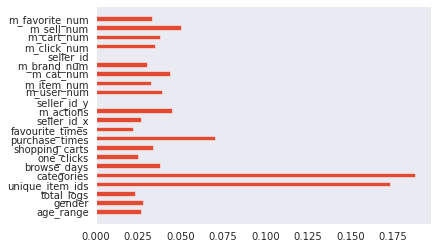

In [144]:
plt.barh(X.columns.tolist(),height=0.5,width=xgb_model.best_estimator_.feature_importances_,align="center")

### 神经网络

Epoch 1/100
20/20 [==============================] - 2s 86ms/step - loss: nan - val_loss: nan
Epoch 2/100
20/20 [==============================] - 2s 76ms/step - loss: nan - val_loss: nan
Epoch 3/100
20/20 [==============================] - 1s 49ms/step - loss: nan - val_loss: nan
Epoch 4/100
20/20 [==============================] - 1s 41ms/step - loss: nan - val_loss: nan
Epoch 5/100
20/20 [==============================] - 1s 45ms/step - loss: nan - val_loss: nan
Epoch 6/100
20/20 [==============================] - 1s 46ms/step - loss: nan - val_loss: nan
Epoch 7/100
20/20 [==============================] - 1s 51ms/step - loss: nan - val_loss: nan
Epoch 8/100
20/20 [==============================] - 1s 46ms/step - loss: nan - val_loss: nan
Epoch 9/100
20/20 [==============================] - 1s 64ms/step - loss: nan - val_loss: nan
Epoch 10/100
20/20 [==============================] - 1s 49ms/step - loss: nan - val_loss: nan
Epoch 11/100
20/20 [==============================] - 1s 64

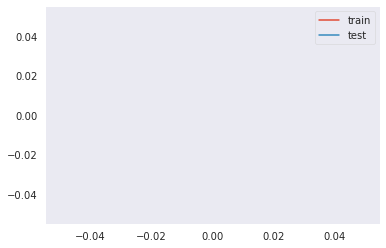

In [146]:
#神经网络：
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense


model_cnn = Sequential()

model_cnn.add(Dense(256, input_shape=(22,)))
model_cnn.add(Dense(256))
model_cnn.add(Dense(1))
sgd = optimizers.SGD(lr=1e-6, decay=1e-8, momentum=0.9, nesterov=True)
model_cnn.compile(loss='mean_squared_error', optimizer=sgd)

X_test.head()
y_test.head()
history=model_cnn.fit(X_train,y_train,batch_size = 10000,epochs = 100,validation_data=(X_test, y_test))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()





In [184]:
Predict_proba = model_cnn.predict(X1)

In [185]:
df_test["model_cnn"] = Predict_proba[:,0]

In [149]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,one_clicks,...,m_click_num,m_cart_num,m_sell_num,m_favorite_num,Logit_prob,Tree_prob,Forest_prob,Gbrt_prob,mlp_prob,xgb_model
0,163968,4605,NaN,2.0,0.0,2,1,1,1,1,...,46546.0,62.0,6896.0,3439.0,0.016046,0.051193,0.000000,0.037035,0.037035,0.043112
1,360576,1581,NaN,2.0,0.0,10,9,4,1,5,...,4027.0,4.0,904.0,212.0,0.207083,0.107196,0.100000,0.152308,0.152308,0.111324
2,98688,1964,NaN,6.0,0.0,6,1,1,1,5,...,14354.0,28.0,2177.0,771.0,0.049771,0.051193,0.100000,0.054649,0.054649,0.046627
3,98688,3645,NaN,6.0,0.0,11,1,1,1,10,...,24419.0,31.0,1107.0,1365.0,0.013593,0.038839,0.000000,0.033826,0.033826,0.038432
4,295296,3361,NaN,2.0,1.0,50,8,4,5,47,...,7213.0,11.0,233.0,217.0,0.063097,0.068542,0.100000,0.059313,0.059313,0.072833
5,33408,98,NaN,2.0,0.0,11,2,1,4,9,...,6527.0,5.0,914.0,579.0,0.227728,0.038839,0.000000,0.041958,0.041958,0.045597
6,230016,1742,NaN,5.0,1.0,13,6,1,1,11,...,42690.0,89.0,2717.0,2483.0,0.038222,0.090711,0.000000,0.071901,0.071901,0.076883
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,...,82733.0,206.0,4727.0,4229.0,0.121865,0.051193,0.083449,0.043467,0.043467,0.048427
8,164736,1963,NaN,3.0,1.0,3,2,1,1,2,...,57321.0,54.0,1497.0,1553.0,0.089775,0.038839,0.000000,0.032330,0.032330,0.034159
9,164736,2634,NaN,3.0,1.0,7,4,3,1,6,...,5513.0,12.0,303.0,118.0,0.101929,0.068542,0.000000,0.068547,0.068547,0.059303


#模型得分
+ Logit_prob:0.6190881
+ Tree_prob:0.6146357
+ Forest_prob:0.5391168
+ Gbrt_prob:0.6247287
+ mlp_prob:0.4415867
+ model_cnn：0.5017429
+ xgb_model：0.6256595



## 结果保存

In [150]:
choose = ["user_id","merchant_id","xgb_model"]
res = df_test[choose]
res.rename(columns={"xgb_model":"prob"},inplace=True)
print(res.head(10))
res.to_csv(path_or_buf = r"prediction.csv",index = False)

/root/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


   user_id  merchant_id      prob
0   163968         4605  0.043112
1   360576         1581  0.111324
2    98688         1964  0.046627
3    98688         3645  0.038432
4   295296         3361  0.072833
5    33408           98  0.045597
6   230016         1742  0.076883
7   164736          598  0.048427
8   164736         1963  0.034159
9   164736         2634  0.059303
